In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from PIL import Image
%matplotlib inline

In [2]:
print(os.listdir("../Datasets/"))

['test', 'train', 'val']


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
datasets_dir = os.listdir("../Datasets/")

In [5]:
train_datasets = "../Datasets/train/"
test_datasets = "../Datasets/test/"
validation_datasets = "../Datasets/val/"

In [6]:
traindatasets_normal = "../Datasets/train/NORMAL/"
train_datasets_Pne = "../Datasets/train/PNEUMONIA/"

In [7]:
print(len(os.listdir(train_datasets_Pne)))
print(len(os.listdir(traindatasets_normal)))

3875
1342


In [8]:
random_value_normal = np.random.randint(0,len(os.listdir(traindatasets_normal)))
random_value_pne = np.random.randint(0,len(os.listdir(train_datasets_Pne)))

Normal Image NORMAL2-IM-1319-0001.jpeg
Penumonia image Datasets Title person1366_bacteria_3490.jpeg


Text(0.5, 1.0, 'Pneumonia')

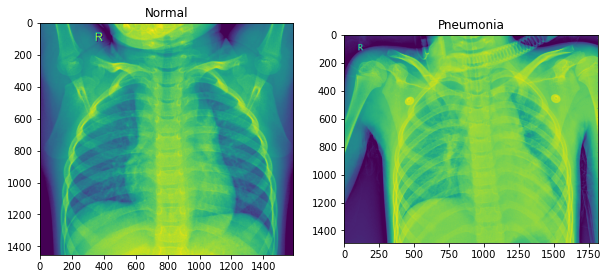

In [9]:
random_normal_pic = os.listdir(traindatasets_normal)[random_value_normal]
normal_image_datasets = random_normal_pic
print("Normal Image",normal_image_datasets)

random_pne_pic = os.listdir(train_datasets_Pne)[random_value_pne]
pne_image_datasets = random_pne_pic
print("Penumonia image Datasets Title", random_pne_pic)

random_normal_pic_load = Image.open(traindatasets_normal+normal_image_datasets)
random_pne_pic_load =Image.open(train_datasets_Pne+pne_image_datasets)

f = plt.figure(figsize = (10,8))#frame Size
subplot = f.add_subplot(1,2,1)
img_load_plot=plt.imshow(random_normal_pic_load)
subplot.set_title("Normal")

subplot = f.add_subplot(1,2,2)#For showing Multiple image in one fram with columns and Row
img_load_plot = plt.imshow(random_pne_pic_load)
subplot.set_title("Pneumonia")

In [10]:
data =plt.imread("../Datasets/train/NORMAL/IM-0115-0001.jpeg")
data.shape

(1858, 2090)

In [20]:
model_for_chest = Sequential()#empty Model
#1st layer
model_for_chest.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model_for_chest.add(MaxPooling2D(pool_size = (2,2)))
#2nd layer
model_for_chest.add(Conv2D(64, (3,3), activation='relu'))
model_for_chest.add(MaxPooling2D(pool_size = (2,2)))
#3nd layer
model_for_chest.add(Conv2D(128, (3,3), activation='relu'))
model_for_chest.add(MaxPooling2D(pool_size = (2,2)))
#4nd layer
model_for_chest.add(Conv2D(256,(3,3), activation='relu'))
model_for_chest.add(MaxPooling2D(pool_size = (2,2)))

#Connected layer or Bridge Layer
model_for_chest.add(Flatten())
model_for_chest.add(Dense(activation = "relu", units=128))
model_for_chest.add(Dense(activation = "sigmoid",units=1))

In [21]:
model_for_chest.compile(optimizer = "adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

In [22]:
number_test_sample = 600
batch_size=32

In [23]:
train_datasets_generator = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
test_datasets_generator = ImageDataGenerator(rescale=1./255)#Image Normalization

In [24]:
train_dataset_manage=train_datasets_generator.flow_from_directory("../Datasets/train/",
                                                                 target_size=(64,64),
                                                                 batch_size=32,
                                                                 class_mode="binary")

test_dataset_manage = test_datasets_generator.flow_from_directory("../Datasets/test",
                                                                 target_size=(64,64),
                                                                 batch_size=32,
                                                                 class_mode="binary")
validation_dataset_mange = test_datasets_generator.flow_from_directory("../Datasets/val",
                                                                      target_size=(64,64),
                                                                      batch_size=32,
                                                                      class_mode="binary")

Found 5217 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [25]:
model_for_chest.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)        

In [26]:
model_for_chest_info = model_for_chest.fit_generator(train_dataset_manage,
                                                    steps_per_epoch=160,
                                                    epochs=2,
                                                    validation_data=validation_dataset_mange,
                                                    validation_steps=600)

Epoch 1/2
160/160 [==============================] - 355s 2s/step - loss: 0.4303 - accuracy: 0.8043 - val_loss: 0.4970 - val_accuracy: 0.7500
Epoch 2/2
160/160 [==============================] - 353s 2s/step - loss: 0.2414 - accuracy: 0.9055 - val_loss: 0.5743 - val_accuracy: 0.6875


In [27]:
test_accuracy= model_for_chest.evaluate_generator(test_dataset_manage, steps=600)
print("Accuracy: ",test_accuracy[1]*100,"%")

Accuracy:  85.57692170143127 %


In [28]:
y_predict = model_for_chest.predict_generator(test_dataset_manage,100)
y_predicts = np.argmax(y_predict,axis=1)

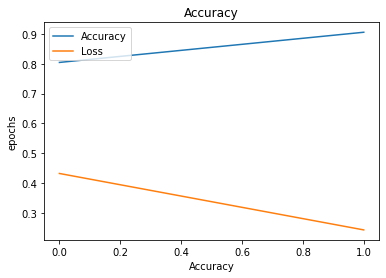

In [29]:
plt.plot(model_for_chest_info.history['accuracy'])
plt.plot(model_for_chest_info.history['loss'])
plt.title("Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("epochs")
plt.legend(["Accuracy","Loss"],loc="upper left")
plt.show()

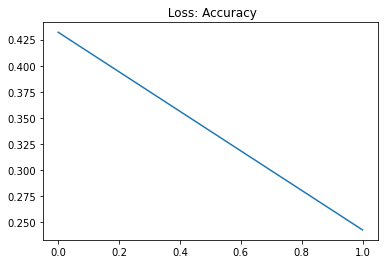

In [30]:
plt.plot(model_for_chest_info.history['loss'])
plt.title(" Loss: Accuracy")
plt.show()